In [1]:
#load the libraries for scraping and analysis
%matplotlib inline
from bs4 import BeautifulSoup
import urllib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import re

In [36]:
#read the page that contains links to data of each city
r = urllib.request.urlopen('http://h1bdata.info/highestpaidcity.php').read()
soup = BeautifulSoup(r, 'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [34]:
#get the list of links for each city
slinks = soup.find_all('a')
slinks = ["http://h1bdata.info/"+re.findall('\"(.+)\"',str(x))[0]  for x in slinks if '?city' in str(x)]

In [55]:
#scrape through the links and collect information of each entry
#we're keeping [company, title, city, state, salary, status]
salaries = []
for locLink in slinks:
    city = locLink.split('=')[-1].replace('+', ' ')
    r = urllib.request.urlopen(locLink).read()
    soup = BeautifulSoup(r, 'lxml')
    #print(soup.prettify()[193000:198000])
    salaryTmp = soup.find_all('td')
    for line in salaryTmp:
        if city+',' in str(line):
            state = re.findall(city+', (.+)</a', str(line))
            if state:
                state = state[0]
                break
    for i in range(0, len(salaryTmp), 7):
        company = re.findall('">(.*)</a', str(salaryTmp[i]))[0]
        title = re.findall('">(.*)</a', str(salaryTmp[i+1]))[0]
        salary = int(re.findall('>(.+)<', str(salaryTmp[i+2]))[0].replace(',', ''))
        status = re.findall('>(.*)<', str(salaryTmp[i+6]).lower())[0]
        salaries.append([company, title, salary, city, state, status])


In [56]:
#convert the data to pandas dataframe; take a look to see if it looks alright
df = pd.DataFrame(salaries, columns=['company', 'title', 'salary', 'city', 'state', 'status'])
df.tail()

,company,title,salary,city,state,status
1681195,CHINESE CHRISTIAN HERALD CRUSADES INC,WEB SYSTEMS SPECIALIST/QUALITY SUPPORT,36000,FLUSHING,NY,certified
1681196,TT TECHNOLOGIES INC,"WINDOWS ADMIN, QA - TRAINER",60000,FLUSHING,NY,certified
1681197,SV IT INC,WORKFORCE(SQL)-TRAINER,60000,FLUSHING,NY,certified
1681198,LAW OFFICES OF JOHN H LEE PC,WRITER AND EDITOR,41280,FLUSHING,NY,certified
1681199,LAW OFFICES OF JOHN H LEE PC,WRITER AND EDITOR,41280,FLUSHING,NY,certified


In [57]:
#save the data to a csv file
df.to_csv('h1data.csv', index=False)

In [173]:
#take a look at some basic stats
print("""Total number of entries: {}
Number of certified entries: {}
Number of denied entries: {}
Number of companies hiring H1B (certified): {}
Number of distinct job titles (certified): {}""".format(len(df), sum(df.status=='certified'), sum(df.status=='denied'),
                                           len(df[df.status=='certified'].company.unique()),
                                           len(df[df.status=='certified'].title.unique())))

Total number of entries: 1681200
Number of certified entries: 1595524
Number of denied entries: 30924
Number of companies hiring H1B (certified): 102130
Number of distinct job titles (certified): 165940


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


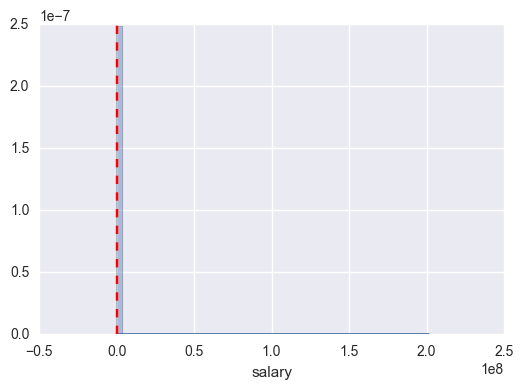

In [155]:
grid=sb.distplot(df[df.status=='certified'].salary)
plt.axvline(x=100000, ls='--', c='red')

This can't be right...people aren't getting **2e8** annual salary...  
Let's take a look at the data with $1m+ salary

In [74]:
df[(df.salary>1000000)&(df.status=='certified')]

,company,title,salary,city,state,status
65480,IDIBON INC,CHIEF OPERATIONS MANAGER AND CEO,1826000,SAN FRANCISCO,CA,certified
80764,WIPRO LIMITED,PROGRAMMER ANALYST,201313899,SAN FRANCISCO,CA,certified
146683,PRICEWATERHOUSECOOPERS LLP,SENIOR ASSOCIATE,7047000,SAN JOSE,CA,certified
258851,HUGHES HUBBARD &amp; REED LLP,ATTORNEY,2400000,NEW YORK,NY,certified
265577,LFG AMERICA PTY LIMITED,CHIEF INVESTMENT OFFICER,1250000,NEW YORK,NY,certified
278581,DEUTSCHE BANK NEW YORK BRANCH,DIRECTOR,2500000,NEW YORK,NY,certified
283448,TRADITION (NORTH AMERICA) INC,EXECUTIVE VICE PRESIDENT,2125000,NEW YORK,NY,certified
283449,TRADITION (NORTH AMERICA) INC,EXECUTIVE VICE PRESIDENT,2125000,NEW YORK,NY,certified
333776,WYSE TECHNOLOGY INC,PRODUCT CONSULTANT,11404057,ROUND ROCK,TX,certified
499851,SPARTA CONSULTING INC,PRINCIPAL CONSULTANT,1116000,FOLSOM,CA,certified


There aren't too many entries, and I am pretty sure some figures are incorrect.  
**$201313899** for a programmer analyst? Come on...  
For the plots below, I am going to filter out salaries above 300k so we the distribution better.  
300k+ are a small subset of outliers (and possibly incorrect entries).

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


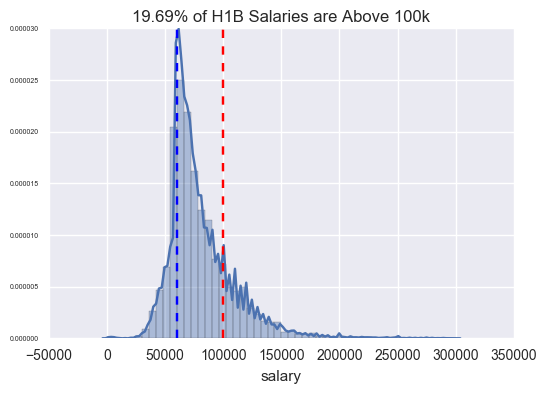

In [169]:
ax=sb.distplot(df[(df.salary<300000)&(df.status=='certified')].salary)
plt.axvline(x=100000, ls='--', c='red')
plt.axvline(x=60000, ls='--', c='blue')
plt.tick_params(axis='y', labelsize=5)
ax.set_title('{:.2%} of H1B Salaries are Above 100k'\
             .format(len(df[(df.salary<300000) & (df.salary>=100000) & (df.status=='certified')]) / 
            len(df[(df.salary<300000) & (df.status=='certified')])))

The data looks a bit skewed, but it may have to do with how average income is in the US.  
I am going to look at a few state specifically, for my personal interest.  
Obviously California with 2 major metro areas is a bit of an odd case.  
I wouldn't be surprised if the data looks bimodal (for SF and LA). 

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


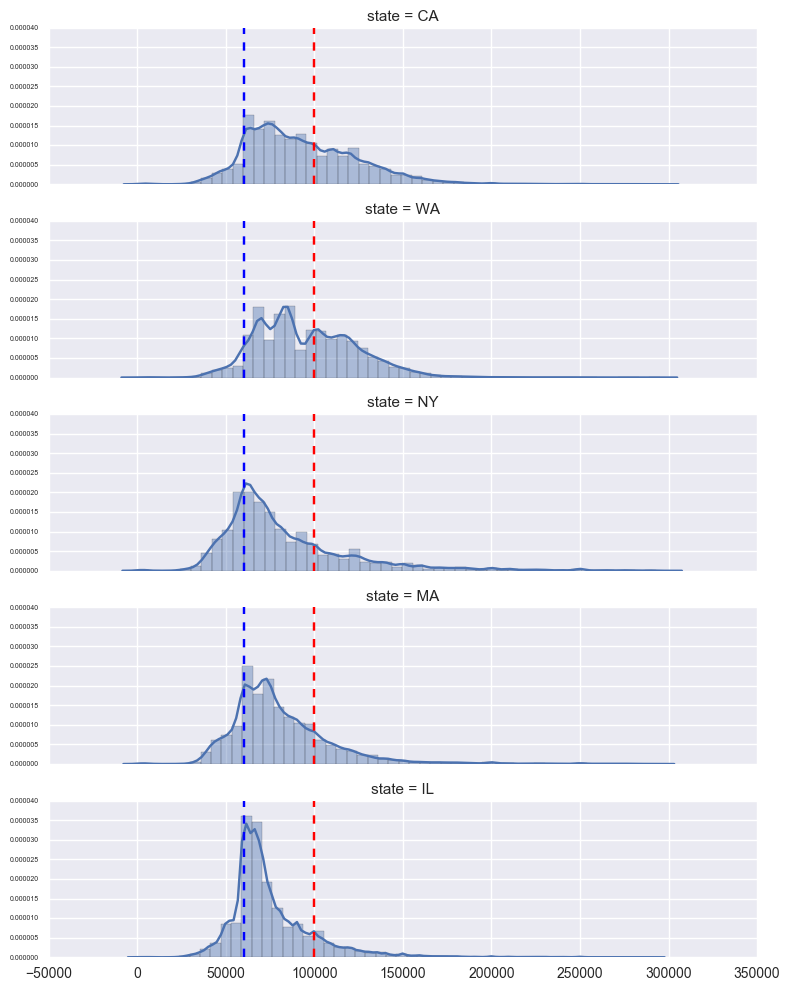

In [170]:
g = sb.FacetGrid(df[(df.salary < 300000) & (df['state'].isin(['CA', 'MA', 'IL', 'WA', 'NY'])) 
                     & (df.status=='certified')], row="state", aspect=4, size=2)
g.map(sb.distplot, "salary");
g.map(plt.axvline,x=100000,ls='--', c='red')
g.map(plt.axvline,x=60000,ls='--', c='blue')
g.map(plt.tick_params, axis='y', labelsize=5)

The distributions are somewhat skewed for all states.  
Salary in IL is pretty low compared to others.  

And here's the boxplot for these states.

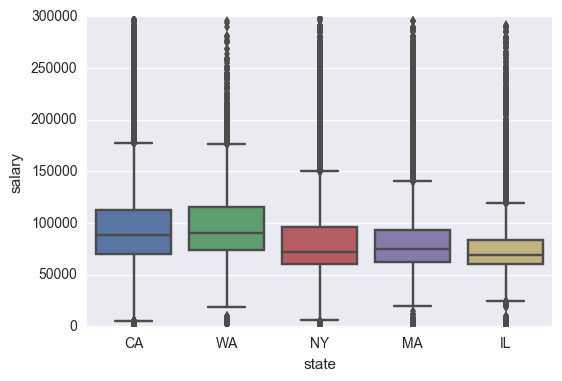

In [128]:
sb.boxplot(x='state', y='salary',
           data=df[(df.salary < 300000) & (df['state'].isin(['CA', 'MA', 'IL', 'WA', 'NY'])) & (df.status=='certified')])

In [167]:
#take a look at states with the highest average H1 salary
df[(df.status=='certified') & (df.salary < 300000)].groupby('state')\
.mean().sort_values('salary', ascending=False).salary[:10]

state
WA    95670.130529
CA    93387.692668
NY    83321.175455
WV    83285.255474
SD    83173.257092
MA    81443.810399
ME    81327.458194
ND    80614.300546
NM    80239.163748
RI    80232.777778
Name: salary, dtype: float64

**Who'd have thought WV and SD makes into the top 5...**

I also want to take a look at the companies I am interested in.

In [117]:
clist = ['GOOGLE INC', 'AMAZON CORPORATE LLC', 'APPLE INC', 'FACEBOOK INC', 'MICROSOFT CORPORATION', 'SALESFORCECOM INC', 
        'IBM CORPORATION', 'LINKEDIN CORPORATION']

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


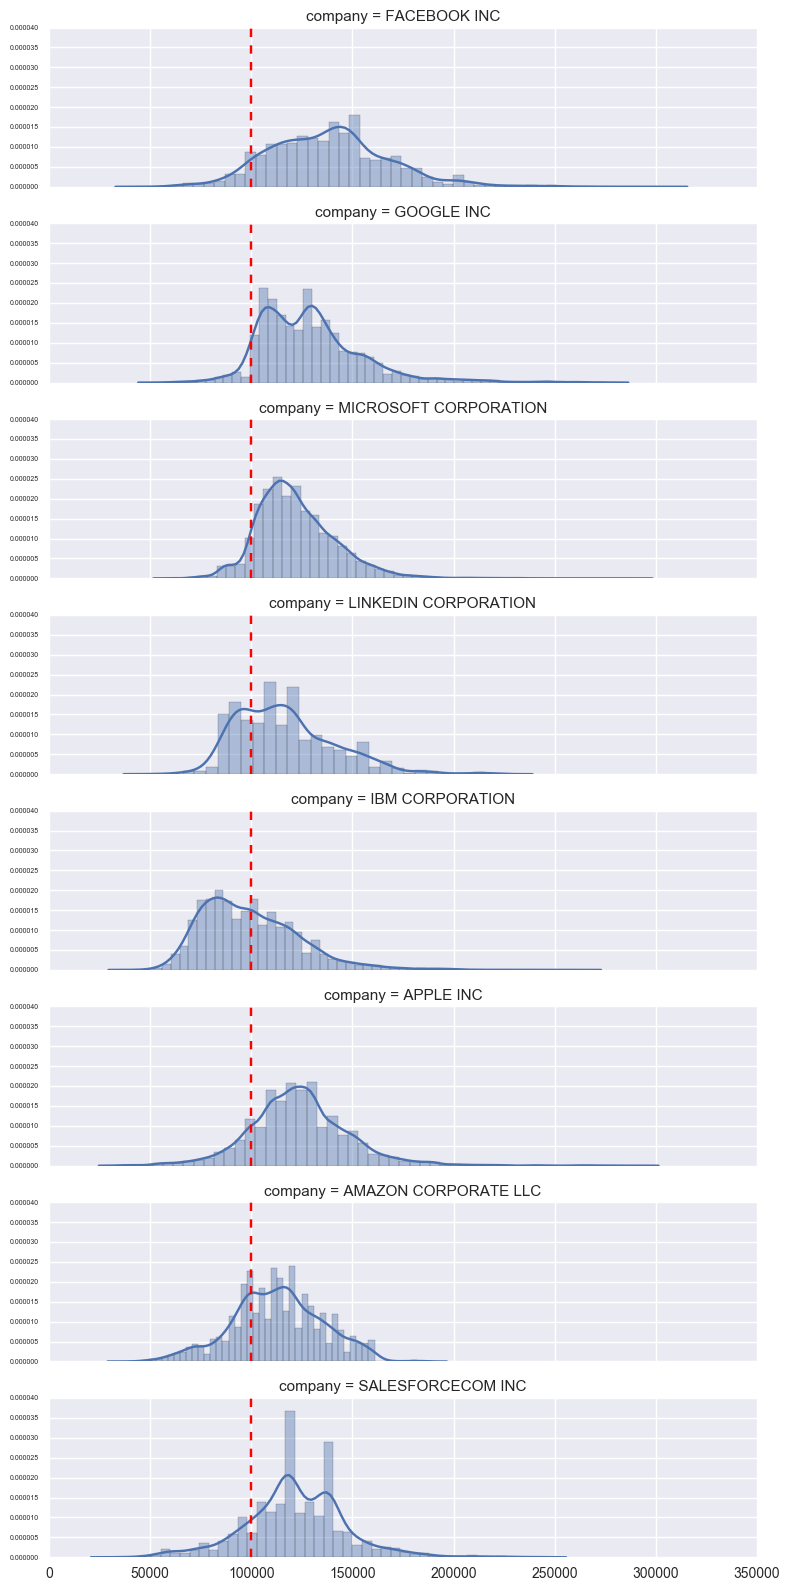

In [144]:
g = sb.FacetGrid(df[(df.salary < 300000) & (df['company'].isin(clist)) 
                     & (df.status=='certified')], row="company", aspect=4, size=2)
g.map(sb.distplot, "salary");
g.map(plt.axvline,x=100000,ls='--', c='red')
g.map(plt.tick_params, axis='y', labelsize=5)

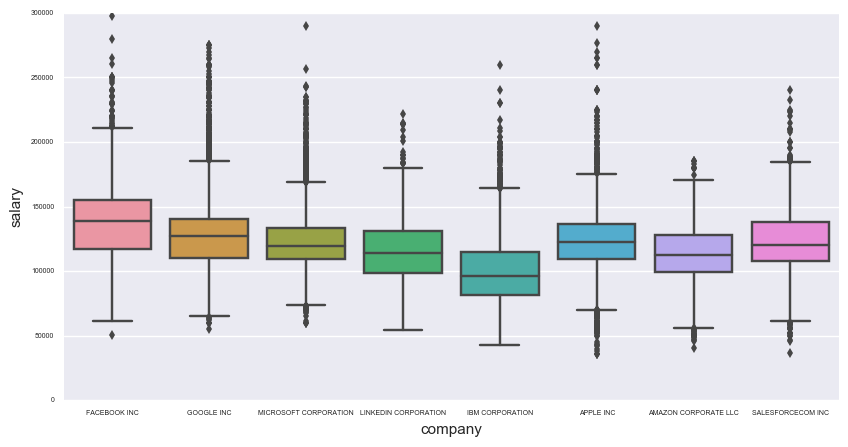

In [151]:
plt.figure(figsize=(10,5))
sb.boxplot(x='company', y='salary',
           data=df[(df.salary < 300000) & (df['company'].isin(clist)) & (df.status=='certified')])
plt.tick_params(labelsize=5)

FB pays pretty well.  
IBM is a bit lackluster (may have to do with the locations of employees)

In [171]:
#take a look at the highest paying companies
df[(df.status=='certified') & (df.salary < 300000)].groupby('company')\
.mean().sort_values('salary', ascending=False).salary[:10]

company
EMERGENCY CARE SPECIALISTS PC                         298000.0
DEPT OF MEDICINE MEDICAL SERVICE GROUP AT SUNY - H    297687.0
PACNET CABLE (USA) INC                                296296.0
FLORIDA SPECIALTY HOLDINGS INC                        295000.0
MOUNTAIN VIEW HOSPITAL                                295000.0
LNG MANAGEMENT SERVICES LLC                           295000.0
RAPIDES REGIONAL PHYSICIANS GROUP                     294999.0
INSTITUTE FOR DEMOCRACY AND COOPERATION               291050.0
BAS HEALTHCARE LOCUMS LLC                             290000.0
XOMA LTD                                              290000.0
Name: salary, dtype: float64

**Actually many are medical doctors...**

In [172]:
#take a look at the companies with most H1B
df[(df.status=='certified') & (df.salary < 300000)].groupby('company')\
.count().sort_values('salary', ascending=False).salary[:10]

company
INFOSYS LIMITED                      104320
TATA CONSULTANCY SERVICES LIMITED     47864
WIPRO LIMITED                         29765
ACCENTURE LLP                         26551
DELOITTE CONSULTING LLP               24701
IBM INDIA PRIVATE LIMITED             21773
HCL AMERICA INC                       15775
MICROSOFT CORPORATION                 14565
CAPGEMINI AMERICA INC                 13815
ERNST &amp; YOUNG US LLP              13336
Name: salary, dtype: int64

**Indian companies dominate the list**